<a href="https://colab.research.google.com/github/geangobo/Bovine-Sounds-Data-Analysis/blob/main/sound_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Testando os áudios extraídos do Google Drive para análises:**

In [ ]:
# Biblioteca para conectar o Python no Google Drive
from google.colab import drive

# Para aparecer a mensagem de autorização do Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


**Conectando no Banco de dados (Google Drive)**

In [ ]:
#Caminho do banco de dados conectado no Google Drive
%cd /content/drive/My Drive/Projeto ESALQ/database_sons
!ls #Para saber o que tem na pasta 

/content/drive/My Drive/Projeto ESALQ/database_sons
01_dm_manha_140722.mp3	 07_pm_manha_140722.wav    46_pm_tarde_120722.wav
01_pm_manha_140722.wav	 07_pm_manha_25112022.wav  46_pm_tarde2_251122.wav
01_pm_manha_251122.wav	 09_pm_manha_251122.wav    46_pm_tarde_251122.wav
02_pm_manha_080722.wav	 11_pm_manha_251122.wav    47_dm_tarde2_251122.wav
02_pm_manha_251122.wav	 44_dm_140722.wav	   47_dm_tarde_251122.wav
02_pm_tarde_080722.wav	 44_pm_manha_251122.wav    47_pm_manha2_251122.wav
02_pm_tarde_251122.wav	 44_pm_tarde2_251122.wav   47_pm_manha_251122.wav
03_dm_manha_100722.wav	 44_pm_tarde_251122.wav    47_pm_tarde_120722.wav
03_dm_tarde_100722.wav	 45_dm_manha_120722.wav    48_pm_manha_110722.wav
03_pm_manha_100722.wav	 45_dm_tarde_120722.wav    48_pm_manha2_110722.wav
03_pm_manha1_110722.wav  45_pm_tarde1_120722.wav   48_pm_tarde_25112022.wav
03_pm_tarde_100722.wav	 45_pm_tarde2_120722.wav   48_tarde_110722.wav
04_pm_manha_110722.wav	 45_pm_tarde_251122.wav    49_pm_manha_110722.wav
0

 **Database foi carregado com sucesso.**

Importando bilbiotecas de:

-Manipulação de dados --> pandas

-Vizualização de dados --> matplotlib (gráficos genéricos)

-Vizualização de dados --> seaborn (gráficos estatísticos)

-Reconhecimento de som --> a definir

-Computação numérica --> numpy

-Computação científica e análise de dados --> scipy (ndarray e fft)

In [ ]:
import pandas as pd 
import os
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt 
import seaborn as sns
import librosa
import librosa.display as ld
from IPython.display import Audio #Para executar o áudio direto no jupyter


**Executando o Áudio**

In [ ]:
Audio('06_pm_manha_251122.wav')

**variáveis e amostragens**

In [ ]:
data, fs = librosa.load('06_pm_manha_251122.wav')

In [ ]:
data

array([0.00382401, 0.00582145, 0.00531411, ..., 0.01905063, 0.02004201,
       0.01336199], dtype=float32)

Quando você imprime um arquivo de áudio no Python, o que é retornado é um array de números que representam as amostras do áudio. O áudio é representado digitalmente por uma sequência de amostras, onde cada amostra é um valor numérico que representa a amplitude do sinal sonoro em um determinado ponto no tempo.

Esses valores numéricos são armazenados em um array, onde cada elemento do array representa uma amostra do áudio. Através desse array, é possível acessar e manipular as amostras individualmente, aplicar **transformações e processamentos de áudio**, entre outras operações.

Ao imprimir o array de um arquivo de áudio, você verá os valores das amostras exibidos no console. Dependendo do tamanho do arquivo e da resolução do áudio, pode ser que haja muitos valores exibidos, o que pode dificultar a visualização direta dos dados. Nesses casos, é comum utilizar outras formas de visualização, como gráficos ou análises estatísticas, para compreender melhor as características do áudio.

Lembrando que cada **valor do array representa a amplitude do sinal sonoro em um ponto específico no tempo**. Através desses valores, é possível reconstruir o áudio reproduzindo as amostras em sequência no tempo.

In [ ]:
data.shape #O áudio tem 51k de amostras.

(51081,)

In [ ]:
fs #frequência de amostragem. Mas vou cravar nos fs = 44100 por conta do Audacity

22050

In [ ]:
#Amostra de frequência a 44kHz fixado Na verdade é 
fs = 48000 

instalando a bilbioteca para Openpyxl é uma biblioteca Python de código aberto que permite manipular arquivos do Excel de forma programática.


In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Diretório dos sons oficial**

In [ ]:
# Definir o diretório onde estão os arquivos de áudio
diretorio_sons = "/content/drive/My Drive/Projeto ESALQ/database_sons"

# Lista para armazenar os dados
dados = []

In [ ]:
# Percorrer todos os arquivos de som no diretório
for diretorio_raiz, diretorios, arquivos in os.walk(diretorio_sons):
    for arquivo in arquivos:
        if arquivo.endswith(".wav"):  # Verificar se é um arquivo de áudio WAV (você pode alterar o formato se necessário)
            caminho_completo = os.path.join(diretorio_raiz, arquivo)

            # Processar o áudio usando a biblioteca librosa
            audio, sr = librosa.load(caminho_completo, sr=48000)
            frequencias = np.abs(librosa.core.stft(audio))
            media_frequencias = np.mean(frequencias)

            # Adicionar os dados à lista
            dados.append({"Arquivo": arquivo, "Média Frequência (FFT)": media_frequencias})

In [ ]:
# Criar um DataFrame usando a lista de dados
df = pd.DataFrame(dados)

# Definir o caminho completo para salvar o arquivo XLSX
caminho_arquivo = "/content/drive/My Drive/Projeto ESALQ/resultadosv1.xlsx"

# Salvar o DataFrame em um arquivo XLSX
df.to_excel(caminho_arquivo, index=False)

**Dispersão**

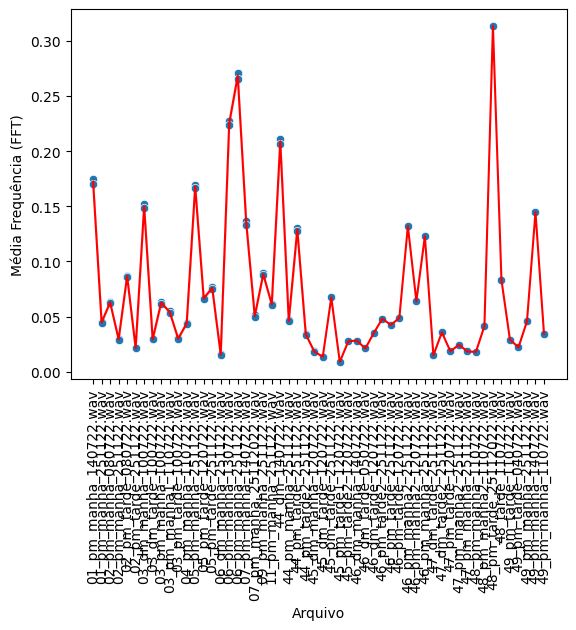

In [ ]:
# Plotar o gráfico de dispersão com reta média
sns.scatterplot(data=df, x="Arquivo", y="Média Frequência (FFT)")
sns.lineplot(data=df, x="Arquivo", y="Média Frequência (FFT)", color="red")

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90)

# Exibir o gráfico
plt.show()

**Análise exploratória dos Dados**

Os primeiros 5 dados do DataFrame

In [ ]:
df.head()

,Arquivo,Média Frequência (FFT)
0,01_pm_manha_140722.wav,0.174746
1,01_pm_manha_251122.wav,0.045202
2,02_pm_manha_080722.wav,0.063468
3,02_pm_manha_251122.wav,0.029818
4,02_pm_tarde_080722.wav,0.087174


Resumo estatístico dos dados

In [ ]:
df.describe()

,Média Frequência (FFT)
count,54.000000
mean,0.072825
std,0.068316
min,0.008868
25%,0.029049
50%,0.046652
75%,0.086526
max,0.316717


últimos valores do DataFrame

In [ ]:
df.tail()

,Arquivo,Média Frequência (FFT)
49,49_pm_tarde_110722.wav,0.029436
50,49_pm_tarde_040722.wav,0.022353
51,49_pm_manha_251122.wav,0.046545
52,49_pm_manha_140722.wav,0.147126
53,49_pm_manha_110722.wav,0.035175


contagem de valores ausentes

In [ ]:
df.isnull().sum()

Arquivo                   0
Média Frequência (FFT)    0
dtype: int64

# **Agora quero trabalhar com MFCC, análise de sentimentos, deep learning e machine learning com o áudio, para extrair mais features.**